In [7]:
# put the import statements and load the dataset 
import numpy as np
from sklearn import datasets
bunchobject = datasets.load_breast_cancer()
import matplotlib.pyplot as plt

In [14]:
def display_scatter(x,y, xlabel='x', ylabel='y',title_name ='default'): 
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(x,y)
    plt.show()

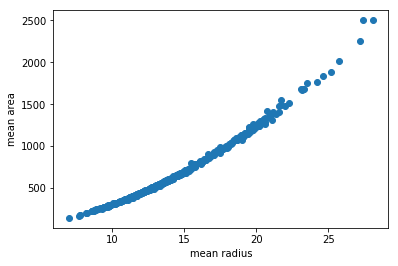

In [15]:
x_index = 0
y_index = 3

x = bunchobject.data[:,x_index]
y = bunchobject.data[:,y_index]

x_label = bunchobject.feature_names[x_index]
y_label = bunchobject.feature_names[y_index]

display_scatter(x,y,x_label,y_label)

## Extracting one column from a numpy array gives you a 1D list i.e. a list of n elements. 

### the <font color = 'blue'>.shape </font> method gives you the dimensions of the array. The output tells you: 
<ul>
<li> 1D array:  <font color = 'blue'> ( number of elements, ) </font>
<li> 2D array <font color = 'blue'> (rows , columns) </font>
</ul>

### the <font color = 'blue'>np.newaxis </font> parameter increases the dimensions by 1.
<ul>
<li> add a row dimension:  <font color = 'blue'>a[np.newaxis,:] </font>
<li> add a column dimension <font color = 'blue'>a[:,np.newaxis] </font>
</ul>

### A <font color = 'red'> 1D array </font> is like a list - there is no concept of rows or columns, just elements. 

### If you want a <font color = 'red'> 2D array </font>  ( n rows by 1 column array) then use the np.newaxis parameter to add a new dimension. 

In [20]:
z1 = np.array( range(10))
print('==this is a 1D array ==')
print(z1.shape)
print(z1)

print('\n==this is a 2D array ==')
z2 = z1[:,np.newaxis] # add a column
print(z2.shape)
print(z2)

print('\n==this is a 2D array ==')
z3 = z1[np.newaxis,:] # add a row
print(z3.shape)
print(z3)

==this is a 1D array ==
(10,)
[0 1 2 3 4 5 6 7 8 9]

==this is a 2D array ==
(10, 1)
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]

==this is a 2D array ==
(1, 10)
[[0 1 2 3 4 5 6 7 8 9]]


## Similar for the breast cancer dataset

In [22]:
print('==this is a 1D array==')
x1 = bunchobject.data[:, 0]
print(x1.shape)
#print(x1)

print('==this is a 2D n by 1 array==')
x2 = bunchobject.data[:, np.newaxis, 0] # add a column
print(x2.shape)
#print(x2)

print('==this is a 2D 1 by n array==')
print('you are not likely to need this')
x3 = bunchobject.data[np.newaxis, :, 0] # add a row
print(x3.shape)
#print(x3)

==this is a 1D array==
(569,)
==this is a 2D n by 1 array==
(569, 1)
==this is a 2D 1 by n array==
you are not likely to need this
(1, 569)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

def linear_regression(bunchobject, x_index, y_index, size, seed):
    
    '''extracting the data'''
    data = bunchobject.data
    x = data[:, np.newaxis, x_index]
    y = data[:, np.newaxis, y_index]
    
    '''split the data into the training and test set'''
    '''size = fraction of records in the test set'''
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = size, random_state = seed)
    
    '''get an instance of the Linear Regression Classifier'''
    regr = linear_model.LinearRegression()
    
    '''fit the model into the training set to get the equation'''
    regr.fit(x_train, y_train)
    print(regr.coef_, regr.intercept_)
    
    '''predicte the y_values given x_values from the test set'''
    y_predicted = regr.predict(x_test)
    
    '''evaluate the error of the prediction from the test set'''
    mse = mean_squared_error(y_test,y_predicted)
    var = r2_score(y_test,y_predicted)
    
    '''na'''
    results = {}
    results['coefficients'] = regr.coef_
    results['intercept'] = regr.intercept_
    results['mean squared error'] = mse
    results['r2 score'] = var
    '''as stated in your problem set'''
    
    return x_train, y_train, x_test, y_predicted, results

In [52]:
{'coefficients': array([[ 100.16755386]]),
'intercept': array([-760.52027342]),
'mean squared error': 2631.2988797244757,
'r2 score': 0.97772539335215169}

NameError: name 'array' is not defined

In [53]:
# def plot_linear_regression (x1, y1, x2, y2, x_label= '' , y_label= '' ): 
#     plt.scatter(x1,y1, color= 'black')
#     plt.plot(linear_regression) 
#     plt.show()

In [54]:
# copy and paste the sample script here 

In [57]:
x_train, y_train, x_test, y_pred, results = linear_regression(bunchobject,0,3,0.4,2752)
print(results)
# plot_linear_regression(x_train, y_train, x_test, y_pred,
#  bunchobject.feature_names[0],
#  bunchobject.feature_names[3])

[[100.16755386]] [-760.52027342]
{'coefficients': array([[100.16755386]]), 'intercept': array([-760.52027342]), 'mean squared error': 2631.2988797244757, 'r2 score': 0.9777253933521517}


In [136]:
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
import numpy as np


def multiple_linear_regression(bunchobject, x_index, y_index, order, size, seed):
    
    '''extracting the data'''
    data = bunchobject.data
    x = data[:, np.newaxis, x_index]
    y = data[:, np.newaxis, y_index]
    
    '''polynomalising the x?'''
    '''need to understand WHAT IS GOING ON HERE'''
    poly = PolynomialFeatures(order,include_bias=False)
    c_data = poly.fit_transform(x,y)
    '''c_data is x_, x_**2, x_**3, x_**4 for each x_'''    
    
    '''split the data into the training and test set'''
    '''size = fraction of records in the test set'''
    x_train, x_test, y_train, y_test = train_test_split(c_data, y, test_size=size, random_state=seed)
    
    '''fit the model into the training set to get the equation'''
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_predicted = regr.predict(x_test)

    mse = mean_squared_error(y_test,y_predicted)
    var = r2_score(y_test,y_predicted)
        
    results = {}
    results['coefficients'] = np.array(regr.coef_.tolist())
    results['intercept'] = np.array(regr.intercept_)
    results['mean squared error'] = mse
    results['r2 score'] = var
    '''as stated in your problem set'''
    
    return x_train[:,0], y_train, x_test[:,0], y_predicted, results

In [134]:
{'coefficients': np.array([[ -1.28141031e+02, 1.57502508e+01, -5.29186793e-01, 7.97220165e-03]]), 
 'intercept': np.array([459.72265999]), 
 'mean squared error': 145.64415629863078, 
 'r2 score': 0.99876708559521399}

{'coefficients': array([[-1.28141031e+02,  1.57502508e+01, -5.29186793e-01,
          7.97220165e-03]]),
 'intercept': array([459.72265999]),
 'mean squared error': 145.64415629863078,
 'r2 score': 0.998767085595214}

In [135]:
x_train, y_train, x_test, y_pred, results = multiple_linear_regression(bunchobject,0,3,4,0.4,2752)
print(results)

[[17.99 ]
 [20.57 ]
 [19.69 ]
 [11.42 ]
 [20.29 ]
 [12.45 ]
 [18.25 ]
 [13.71 ]
 [13.   ]
 [12.46 ]
 [16.02 ]
 [15.78 ]
 [19.17 ]
 [15.85 ]
 [13.73 ]
 [14.54 ]
 [14.68 ]
 [16.13 ]
 [19.81 ]
 [13.54 ]
 [13.08 ]
 [ 9.504]
 [15.34 ]
 [21.16 ]
 [16.65 ]
 [17.14 ]
 [14.58 ]
 [18.61 ]
 [15.3  ]
 [17.57 ]
 [18.63 ]
 [11.84 ]
 [17.02 ]
 [19.27 ]
 [16.13 ]
 [16.74 ]
 [14.25 ]
 [13.03 ]
 [14.99 ]
 [13.48 ]
 [13.44 ]
 [10.95 ]
 [19.07 ]
 [13.28 ]
 [13.17 ]
 [18.65 ]
 [ 8.196]
 [13.17 ]
 [12.05 ]
 [13.49 ]
 [11.76 ]
 [13.64 ]
 [11.94 ]
 [18.22 ]
 [15.1  ]
 [11.52 ]
 [19.21 ]
 [14.71 ]
 [13.05 ]
 [ 8.618]
 [10.17 ]
 [ 8.598]
 [14.25 ]
 [ 9.173]
 [12.68 ]
 [14.78 ]
 [ 9.465]
 [11.31 ]
 [ 9.029]
 [12.78 ]
 [18.94 ]
 [ 8.888]
 [17.2  ]
 [13.8  ]
 [12.31 ]
 [16.07 ]
 [13.53 ]
 [18.05 ]
 [20.18 ]
 [12.86 ]
 [11.45 ]
 [13.34 ]
 [25.22 ]
 [19.1  ]
 [12.   ]
 [18.46 ]
 [14.48 ]
 [19.02 ]
 [12.36 ]
 [14.64 ]
 [14.62 ]
 [15.37 ]
 [13.27 ]
 [13.45 ]
 [15.06 ]
 [20.26 ]
 [12.18 ]
 [ 9.787]
 [11.6  ]
 [14.42 ]


In [119]:
def plot_linear_regression(x1, y1, x2, y2, x_label='', y_label=''):
    plt.scatter(x1,y1, color='black')
    plt.scatter(x2,y2, color='red')
    plt.show()

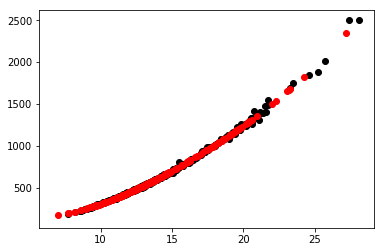

In [120]:
plot_linear_regression(x_train, y_train, x_test, y_pred, bunchobject.feature_names[0], bunchobject.feature_names[3])